In [1]:
import mysql.connector
from sqlalchemy import create_engine

import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import scipy.stats.distributions as dist
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

passwd = ''


In [2]:
con = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd = 'Nafissulthoni16')

In [3]:
con

In [4]:
c = con.cursor(buffered=True)
query = 'SHOW databases'
c.execute(query)

In [5]:
c.fetchall()

[('flask_mysql',),
 ('hotwheels',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sql_hr',),
 ('sql_inventory',),
 ('sql_invoicing',),
 ('sql_store',),
 ('sys',),
 ('world',)]

In [6]:
query = 'USE world'
c.execute(query)

In [7]:
query = 'SHOW tables'
c.execute(query)
c.fetchall()

[('city',), ('country',), ('countrylanguage',)]

In [8]:
query = 'SELECT * FROM country'
c.execute(query)
res = c.fetchall()
cols = c.column_names

#bikin DF
country_df = pd.DataFrame(res, columns = cols)

country_df

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6041.00,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,17000.00,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,116729.00,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3377.00,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [9]:
country_10 = country_df.loc[:,['Name','Continent','Region','IndepYear','Population']]
country_10

,Name,Continent,Region,IndepYear,Population
0,Aruba,North America,Caribbean,NaN,103000
1,Afghanistan,Asia,Southern and Central Asia,1919.0,22720000
2,Angola,Africa,Central Africa,1975.0,12878000
3,Anguilla,North America,Caribbean,NaN,8000
4,Albania,Europe,Southern Europe,1912.0,3401200
...,...,...,...,...,...
234,Yemen,Asia,Middle East,1918.0,18112000
235,Yugoslavia,Europe,Southern Europe,1918.0,10640000
236,South Africa,Africa,Southern Africa,1910.0,40377000
237,Zambia,Africa,Eastern Africa,1964.0,9169000


In [10]:
country_10.sort_values(by=['Population']).head(10)

,Name,Continent,Region,IndepYear,Population
34,Bouvet Island,Antarctica,Antarctica,NaN,0
100,British Indian Ocean Territory,Africa,Eastern Africa,NaN,0
187,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,NaN,0
11,Antarctica,Antarctica,Antarctica,NaN,0
12,French Southern territories,Antarctica,Antarctica,NaN,0
221,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,NaN,0
93,Heard Island and McDonald Islands,Antarctica,Antarctica,NaN,0
166,Pitcairn,Oceania,Polynesia,NaN,50
38,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,NaN,600
225,Holy See (Vatican City State),Europe,Southern Europe,1929.0,1000


In [11]:
query = 'SELECT * FROM city'
c.execute(query)
res = c.fetchall()
cols = c.column_names

#bikin DF
city_df = pd.DataFrame(res, columns = cols)

city_df.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [12]:
city_10 = city_df.groupby('CountryCode').agg({'Population' : 'mean'}).sort_values(
by=['Population'], ascending = False)
city_10

,Population
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
...,...
NIU,682.0
VAT,455.0
CCK,335.0


In [13]:
city_10['mean'] = city_10['Population']

city_10_mean = city_10.drop(['Population'], axis = 1)
city_10_mean.head(10)

,mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


## __1.3__

In [14]:
query = 'SELECT * FROM countrylanguage'
c.execute(query)
res = c.fetchall()
cols = c.column_names

#bikin DF
CL_df = pd.DataFrame(res, columns = cols)

CL_df

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
...,...,...,...,...
979,ZMB,Tongan,F,11.0
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2


In [15]:
CL_10 = CL_df['Language'].value_counts().to_frame()
CL_10['count'] = CL_10['Language']
CL_10_count = CL_10.drop(['Language'], axis = 1)
CL_10_count.head(10)

,count
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14
Ukrainian,12


# __NOMOR 2 (PIE CHART)__

In [16]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [17]:
country = country_df.groupby('Continent').agg({'Population' : 'count'})
country

,Population
Continent,
Africa,58
Antarctica,5
Asia,51
Europe,46
North America,37
Oceania,28
South America,14


In [18]:
pie_label = list(country_df['Continent'].unique())
pie_label

['North America',
 'Asia',
 'Africa',
 'Europe',
 'South America',
 'Oceania',
 'Antarctica']

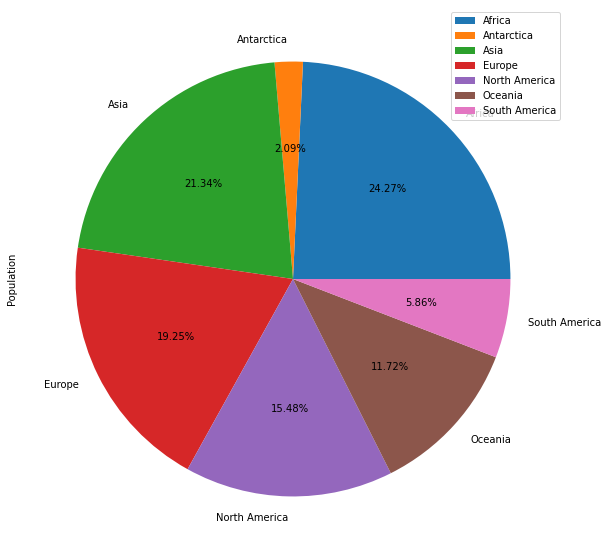

In [19]:
country.plot.pie(y='Population', figsize=(20,10), autopct='%2.2f%%')
plt.show()

## __2.1__ 
- Berdasarkan Pie Chart di atas, Benua yang menjadi penyumbang populasi terbanyak adalah Benua North America dengan jumlah 24.3 %

## __2.2__
- Total presentase populasi manusia yang berada di Benua America sebesar 39.8 %

# __NOMOR 3 (Horizontal Barplot)__

In [20]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [21]:
afrika = country_df[country_df['Continent'] == 'Africa']
afrika.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
17,BDI,Burundi,Africa,Eastern Africa,27834.00,1962.0,6695000,46.2,903.00,982.00,Burundi/Uburundi,Republic,Pierre Buyoya,552.0,BI
19,BEN,Benin,Africa,Western Africa,112622.00,1960.0,6097000,50.2,2357.00,2141.00,Bénin,Republic,Mathieu Kérékou,187.0,BJ
20,BFA,Burkina Faso,Africa,Western Africa,274000.00,1960.0,11937000,46.7,2425.00,2201.00,Burkina Faso,Republic,Blaise Compaoré,549.0,BF
35,BWA,Botswana,Africa,Southern Africa,581730.00,1966.0,1622000,39.3,4834.00,4935.00,Botswana,Republic,Festus G. Mogae,204.0,BW


In [22]:
afrika_country = afrika.groupby('Name').agg({'Population':'sum'}).sort_values(by=['Population'], ascending = False).reset_index()
afrika_10 = afrika_country.head(10)
afrika_10

,Name,Population
0,Nigeria,111506000
1,Egypt,68470000
2,Ethiopia,62565000
3,"Congo, The Democratic Republic of the",51654000
4,South Africa,40377000
5,Tanzania,33517000
6,Algeria,31471000
7,Kenya,30080000
8,Sudan,29490000
9,Morocco,28351000


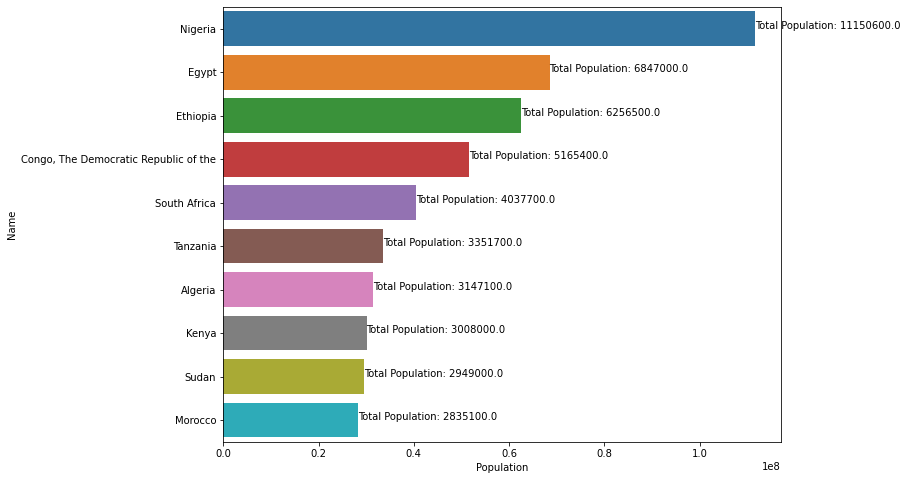

In [23]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = afrika_10, x = 'Population', y = 'Name')

total = len(afrika_10['Name'])
for p in ax.patches:
        percentage = 'Total Population: {:.1f}'.format(p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

## 3.2 Nigeria adalah dengan populasi terbesar

## 3.3 Negara dengan populasi urutan 10 di Afrika adalah Morocco

## 3.4 Negara Ethiopia total populasi 62565000

# __Nomor 4 __

## __4.1__
- IQR

In [24]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    object 
 8   GNP             239 non-null    object 
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 28.1+ KB


In [25]:
country_df.LifeExpectancy = country_df['LifeExpectancy'].astype(float)
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    object 
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 28.1+ KB


In [26]:
country_df.describe()

,IndepYear,Population,LifeExpectancy,Capital
count,192.000000,2.390000e+02,222.000000,232.000000
mean,1847.260417,2.543410e+07,66.486036,2071.306034
std,420.831370,1.093398e+08,11.519267,1184.095609
min,-1523.000000,0.000000e+00,37.200000,1.000000
25%,1906.750000,2.380000e+05,60.300000,915.750000
50%,1960.000000,3.869000e+06,70.150000,2449.500000
75%,1974.000000,1.493550e+07,75.500000,3065.250000
max,1994.000000,1.277558e+09,83.500000,4074.000000


In [27]:
IQR_Asia = round(country_df.describe().loc['75%','LifeExpectancy'] - country_df.describe().loc['25%', 'LifeExpectancy'], 2)

### - IQR di Benua Asia adalah 15.2

## __4.2__
- Mean, Median, STD

### __Mean__

In [28]:
mean_df = round((country_df[['LifeExpectancy']].mean()), 2)
mean_df

LifeExpectancy    66.49
dtype: float64

In [29]:
Median_df = round((country_df[['LifeExpectancy']].median()), 2)
Median_df

LifeExpectancy    70.15
dtype: float64

In [30]:
std_df = round((country_df[['LifeExpectancy']].std()), 2)
std_df

LifeExpectancy    11.52
dtype: float64

## __4.3__

In [31]:
up_bound = round((country_df.describe().loc['75%','LifeExpectancy'] + IQR_Asia*1.5), 2)
up_bound

98.3

In [32]:
low_bound = round((country_df.describe().loc['25%','LifeExpectancy'] - IQR_Asia*1.5), 2)
low_bound

37.5

## 4.5

In [34]:
asian = country_df[country_df['Continent'] == 'Asia']

In [35]:
asian[(asian['LifeExpectancy'] > up_bound) | (asian['LifeExpectancy'] < low_bound)]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2


# __Nomor 5__

## __5.1__

In [36]:
country_df['GNP'] = country_df['GNP']*1000000

In [37]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828000000.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976000000.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648000000.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63200000.00,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205000000.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [38]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    object 
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 28.1+ KB


In [39]:
country_df['GNP'] = country_df['GNP'].astype(float)

In [40]:
def perkapita(kolom,gnp, population):
    country_df[kolom] = gnp/population

In [41]:
perkapita('GNPperkapita', country_df['GNP'], country_df['Population'])
country_df['GNPperkapita'].head().to_frame()

,GNPperkapita
0,8038.834951
1,263.028169
2,516.229228
3,7900.000000
4,942.314477


# __Nomor 6__
- 1 dan 2

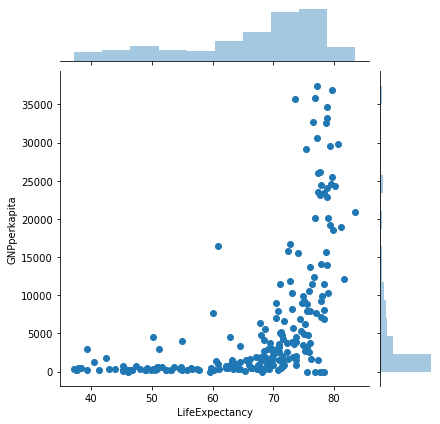

In [42]:
sns.jointplot(data = country_df, x = 'LifeExpectancy', y = 'GNPperkapita')
plt.show()

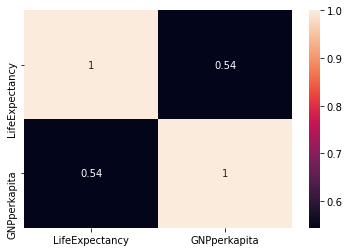

In [43]:
sns.heatmap(country_df[['LifeExpectancy','GNPperkapita']].corr(),annot = True)
plt.show()

LifeExpectancy dan GNPperCapita memiliki korelasi yang positif dengan nilai 0.54

## __6.3__

In [44]:
GNP = country_df[country_df['GNP'] == country_df['GNP'].max()]
GNP

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperkapita
223,USA,United States,North America,North America,9363520.00,1776.0,278357000,77.1,8.510700e+12,8110900.00,United States,Federal Republic,George W. Bush,3813.0,US,30574.765499


In [45]:
GNP[['Name', 'Continent', 'GNP']]

,Name,Continent,GNP
223,United States,North America,8.510700e+12


# __Nomor 7__

## 7.1

In [46]:
country_df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperkapita
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,8.280000e+08,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5.976000e+09,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6.648000e+09,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,6.320000e+07,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+09,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477


In [47]:
europe = country_df[country_df['Continent'] == 'Europe']
europe.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperkapita
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3.205000e+09,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477
5,AND,Andorra,Europe,Southern Europe,468.00,1278.0,78000,83.5,1.630000e+09,None,Andorra,Parliamentary Coprincipality,,55.0,AD,20897.435897
15,AUT,Austria,Europe,Western Europe,83859.00,1918.0,8091800,77.7,2.118600e+11,206025.00,Österreich,Federal Republic,Thomas Klestil,1523.0,AT,26182.060852
18,BEL,Belgium,Europe,Western Europe,30518.00,1830.0,10239000,77.8,2.497040e+11,243948.00,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,24387.537845
22,BGR,Bulgaria,Europe,Eastern Europe,110994.00,1908.0,8190900,70.9,1.217800e+10,10169.00,Balgarija,Republic,Petar Stojanov,539.0,BG,1486.771905


## 7.2